# **Data Analysis**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv(r"path", usecols=range(8))
# Display the first few rows of the dataset
print(df.head())

  Session ID  Device Traffic Source  Bounce Rate (%)  Avg. Scroll Depth (%)  \
0      S0001  Mobile       Meta Ads               88                     35   
1      S0002  Mobile       Meta Ads               82                     40   
2      S0003  Mobile       Meta Ads               91                     20   
3      S0004  Mobile       Meta Ads               85                     25   
4      S0005  Mobile       Meta Ads               89                     30   

   CTA Clicked  Time on Page (s)  Form Submitted  
0            0                22               0  
1            1                35               1  
2            0                15               0  
3            0                18               0  
4            1                30               0  


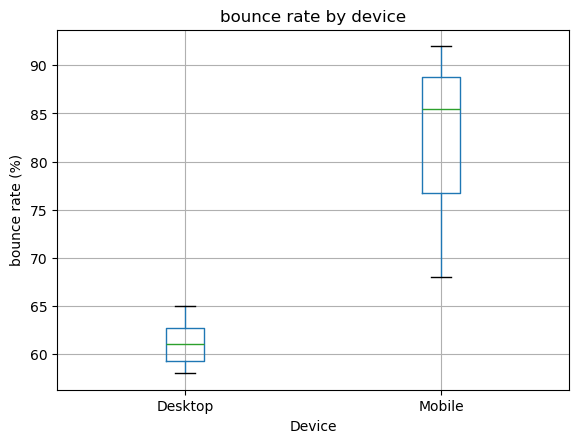

In [4]:
# boxplot for bounce rate by device
df.boxplot(column='Bounce Rate (%)', by='Device')
plt.title('bounce rate by device')
plt.suptitle('')
plt.xlabel('Device')
plt.ylabel('bounce rate (%)')
plt.show()

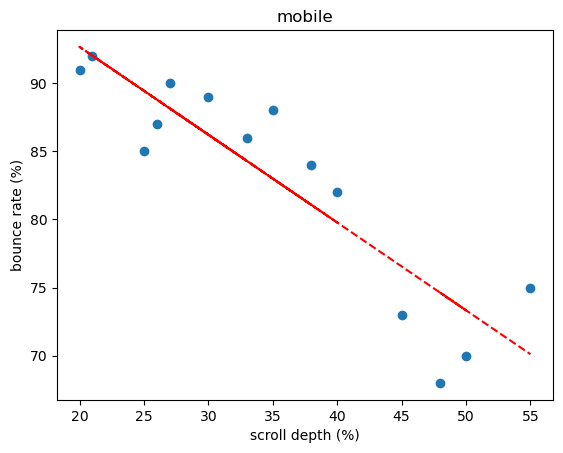

In [5]:
# scatter plot bounce rate и scroll depth for mobile with trendline
import numpy as np

df_mobile = df[df['Device'] == 'Mobile']
x = df_mobile['Avg. Scroll Depth (%)']
y = df_mobile['Bounce Rate (%)']

plt.scatter(x, y)
plt.xlabel('scroll depth (%)')
plt.ylabel('bounce rate (%)')
plt.title('mobile')

# adding trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='red', linestyle='--')  # trendline

plt.show()

In [6]:
# correlation for mobile
corr_mobile = df[df['Device'] == 'Mobile'][['Avg. Scroll Depth (%)', 'Bounce Rate (%)']].corr().iloc[0,1]
print('corr mobile:', corr_mobile)

corr mobile: -0.8936815112705506


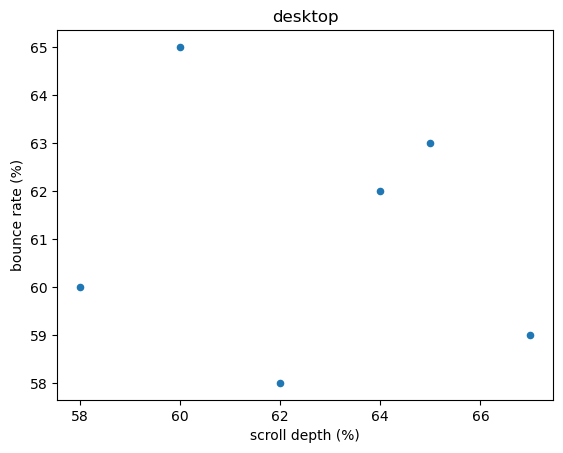

In [7]:
# scatter plot for desktop
df[df['Device'] == 'Desktop'].plot.scatter(x='Avg. Scroll Depth (%)', y='Bounce Rate (%)', title='desktop')
plt.xlabel('scroll depth (%)')
plt.ylabel('bounce rate (%)')
plt.show()

In [8]:
# correlation desktop
corr_desktop = df[df['Device'] == 'Desktop'][['Avg. Scroll Depth (%)', 'Bounce Rate (%)']].corr().iloc[0,1]
print('corr desktop:', corr_desktop)

corr desktop: -0.15185105250085082


In [9]:
from scipy.stats import f_oneway

# Sum of submission for each source
print(df.groupby('Traffic Source')['Form Submitted'].sum())

# Preparing groups for ANOVA
groups = [df[df['Traffic Source'] == src]['Form Submitted'] for src in df['Traffic Source'].unique()]

# ANOVA
anova_result = f_oneway(*groups)
print('p-value:', anova_result.pvalue)


Traffic Source
Email       4
Meta Ads    1
Organic     4
Name: Form Submitted, dtype: int64
p-value: 0.003008471369141564


,Traffic Source,Form Submitted
0,Email,4
1,Meta Ads,1
2,Organic,4


C:\Users\ttuga\AppData\Local\Temp\ipykernel_26612\3218457884.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=form_counts, x='Traffic Source', y='Form Submitted', palette='Set2')


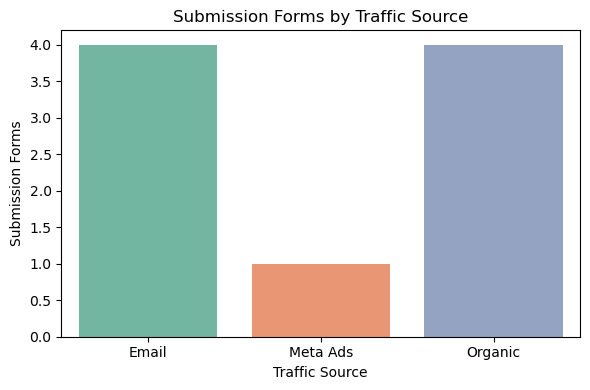

In [12]:
import seaborn as sns

# gathering in groups and calculating by traffic source
form_counts = df.groupby('Traffic Source')['Form Submitted'].sum().reset_index()
display(form_counts)

# barplot
plt.figure(figsize=(6, 4))
sns.barplot(data=form_counts, x='Traffic Source', y='Form Submitted', palette='Set2')
plt.title('Submission Forms by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Submission Forms')
plt.tight_layout()
plt.show()

,Traffic Source,Time on Page (s)
0,Email,55.2
1,Meta Ads,21.9
2,Organic,50.2


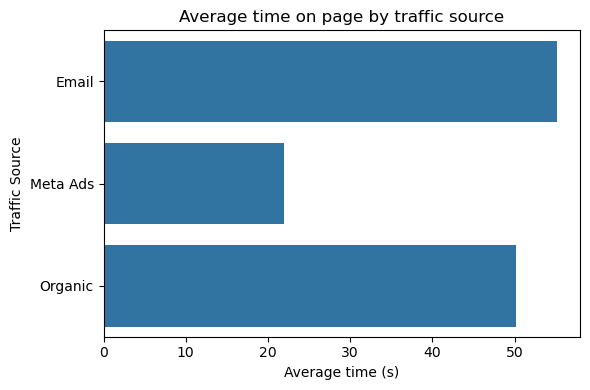

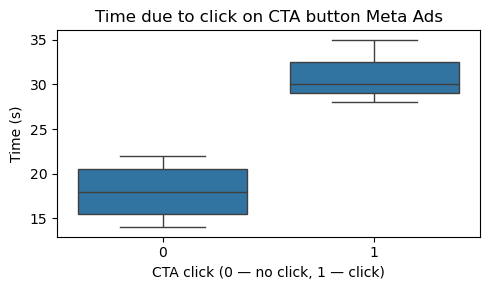

Meta Ads: average time (clicked) = 31.0 s, average time (no click) = 18.0 s


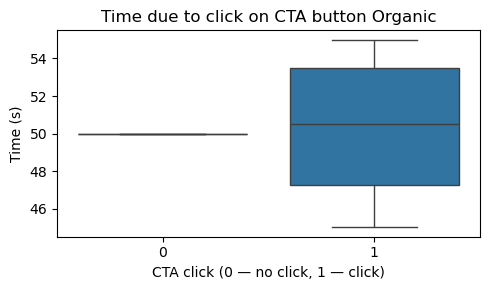

Organic: average time (clicked) = 50.2 s, average time (no click) = 50.0 s


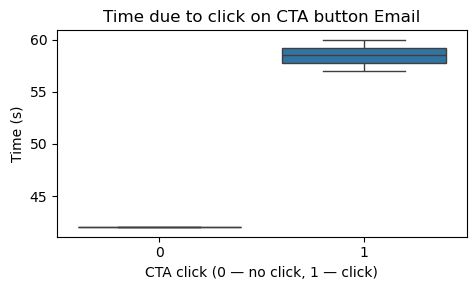

Email: average time (clicked) = 58.5 s, average time (no click) = 42.0 s


In [13]:
# average time on page for each source
avg_time = df.groupby('Traffic Source')['Time on Page (s)'].mean().reset_index()
display(avg_time)

# visualizing average time by using barplot
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_time, x='Time on Page (s)', y='Traffic Source')
plt.title('Average time on page by traffic source')
plt.xlabel('Average time (s)')
plt.ylabel('Traffic Source')
plt.tight_layout()
plt.show()

# boxplot
for src in df['Traffic Source'].unique():
    subset = df[df['Traffic Source'] == src]
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=subset, x='CTA Clicked', y='Time on Page (s)')
    plt.title(f'Time due to click on CTA button {src}')
    plt.xlabel('CTA click (0 — no click, 1 — click)')
    plt.ylabel('Time (s)')
    plt.tight_layout()
    plt.show()
    # calculating average for each group
    mean_clicked = subset[subset['CTA Clicked'] == 1]['Time on Page (s)'].mean()
    mean_not_clicked = subset[subset['CTA Clicked'] == 0]['Time on Page (s)'].mean()
    print(f'{src}: average time (clicked) = {mean_clicked:.1f} s, average time (no click) = {mean_not_clicked:.1f} s')